# Елхимова И. С. ИУ5-63Б

## 6 Вариант

### Задача №1

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
Доп заданние: для произвольной колонки данных построить график "Ящик с усами (boxplot)".

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [14]:
data = pd.read_csv('Admission_Predict1.csv', sep=",")

In [15]:
data.shape

(400, 9)

In [16]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [19]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [20]:
# Определим уникальные значения для целевого признака
data['Research'].unique()

array([1, 0])

Целевой признак является бинарным и содержит только значения 0 и 1.

## Ящик с усами

Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='GRE Score'>

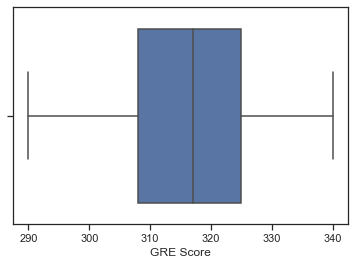

In [21]:
sns.boxplot(x=data['GRE Score'])

<AxesSubplot:ylabel='GRE Score'>

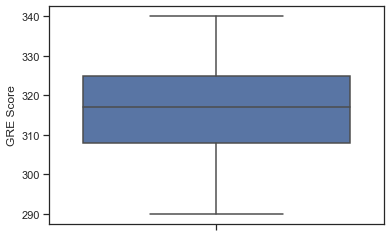

In [22]:
sns.boxplot(y=data['GRE Score'])

## Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Research"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [23]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с GRE Score(0.58). Этот признак обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с концентрацией Chance of Admit (0.55), CGPA(0.52) и TOEFL Score (0.49). Эти признаки стоит также оставить в модели.
- Целевой признак слабо коррелирует с остальными. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- TOEFL Score и GRE Score очень сильно коррелируют между собой (0.84). Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из признаков TOEFL Score и GRE Score лучше выбрать GRE Score, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.
- По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [24]:
data.corr(method='pearson')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [25]:
data.corr(method='kendall')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.064791,-0.101776,-0.119730,-0.121769,-0.057908,-0.033369,-0.051616,0.020912
GRE Score,-0.064791,1.000000,0.667509,0.544494,0.467137,0.414973,0.659007,0.492727,0.639933
TOEFL Score,-0.101776,0.667509,1.000000,0.567294,0.514420,0.424169,0.653665,0.421512,0.625485
University Rating,-0.119730,0.544494,0.567294,1.000000,0.638358,0.547389,0.611896,0.411914,0.599076
SOP,-0.121769,0.467137,0.514420,0.638358,1.000000,0.600787,0.565253,0.385807,0.545497
LOR,-0.057908,0.414973,0.424169,0.547389,0.600787,1.000000,0.510758,0.350789,0.518433
CGPA,-0.033369,0.659007,0.653665,0.611896,0.565253,0.510758,1.000000,0.434767,0.720655
Research,-0.051616,0.492727,0.421512,0.411914,0.385807,0.350789,0.434767,1.000000,0.480270
Chance of Admit,0.020912,0.639933,0.625485,0.599076,0.545497,0.518433,0.720655,0.480270,1.000000


In [26]:
data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.093525,-0.146489,-0.161542,-0.170409,-0.081427,-0.042829,-0.063138,0.038328
GRE Score,-0.093525,1.000000,0.831860,0.676265,0.613743,0.547786,0.831848,0.595911,0.815352
TOEFL Score,-0.146489,0.831860,1.000000,0.696868,0.652922,0.549405,0.825720,0.504322,0.795573
University Rating,-0.161542,0.676265,0.696868,1.000000,0.740387,0.653256,0.750562,0.454131,0.731977
SOP,-0.170409,0.613743,0.652922,0.740387,1.000000,0.727178,0.724348,0.443648,0.694715
LOR,-0.081427,0.547786,0.549405,0.653256,0.727178,1.000000,0.666012,0.400385,0.670562
CGPA,-0.042829,0.831848,0.825720,0.750562,0.724348,0.666012,1.000000,0.530265,0.878403
Research,-0.063138,0.595911,0.504322,0.454131,0.443648,0.400385,0.530265,1.000000,0.581742
Chance of Admit,0.038328,0.815352,0.795573,0.731977,0.694715,0.670562,0.878403,0.581742,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.